In [21]:
# Оценка качества модели линейной регрессии
# Вычислим три метрики для оценки качества модели:
# 1. MAE (Mean Absolute Error) - Средняя абсолютная ошибка
# 2. R² (Coefficient of Determination) - Коэффициент детерминации
# 3. MAPE (Mean Absolute Percentage Error) - Средняя абсолютная процентная ошибка

from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Функция для вычисления MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Вычисляем метрики
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Выводим результаты
print("Оценка качества модели линейной регрессии:")
print(f"MAE (Средняя абсолютная ошибка): {mae:.2f}")
print(f"R² (Коэффициент детерминации): {r2:.2f}")
print(f"MAPE (Средняя абсолютная процентная ошибка): {mape:.2f}%")


Оценка качества модели линейной регрессии:
MAE (Средняя абсолютная ошибка): 4189.81
R² (Коэффициент детерминации): 0.78
MAPE (Средняя абсолютная процентная ошибка): 47.24%


In [22]:
# Анализ результатов

# Создаем DataFrame для наглядного сравнения метрик
metrics_df = pd.DataFrame({
    'Метрика': ['MAE', 'R²', 'MAPE'],
    'Значение': [mae, r2, f"{mape}%"],
    'Интерпретация': [
        'Среднее абсолютное отклонение предсказаний от реальных значений. Чем меньше, тем лучше.',
        'Доля объясненной дисперсии. Близко к 1 - отлично, близко к 0 - плохо.',
        'Средняя процентная ошибка. Чем меньше, тем лучше.'
    ]
})

display(metrics_df)

,Метрика,Значение,Интерпретация
0,MAE,4189.810967,Среднее абсолютное отклонение предсказаний от ...
1,R²,0.783709,Доля объясненной дисперсии. Близко к 1 - отлич...
2,MAPE,47.239058525717795%,"Средняя процентная ошибка. Чем меньше, тем лучше."


In [23]:
# Вывод о качестве модели

print("\nВывод о качестве модели:")

if r2 > 0.7:
    print("1. Модель с высоким качеством (R² > 0.7) - хорошо объясняет вариативность данных")
elif r2 > 0.5:
    print("1. Модель с удовлетворительным качеством (0.5 < R² ≤ 0.7) - частично объясняет данные")
else:
    print("1. Модель с низким качеством (R² ≤ 0.5) - плохо объясняет вариативность данных")

if mape < 10:
    print("2. Отличная точность (MAPE < 10%) - средняя ошибка менее 10%")
elif mape < 20:
    print("2. Хорошая точность (10% ≤ MAPE < 20%) - средняя ошибка 10-20%")
elif mape < 30:
    print("2. Удовлетворительная точность (20% ≤ MAPE < 30%) - средняя ошибка 20-30%")
else:
    print("2. Низкая точность (MAPE ≥ 30%) - средняя ошибка более 30%")

print(f"3. Среднее абсолютное отклонение составляет {mae:.2f} денежных единиц")


Вывод о качестве модели:
1. Модель с высоким качеством (R² > 0.7) - хорошо объясняет вариативность данных
2. Низкая точность (MAPE ≥ 30%) - средняя ошибка более 30%
3. Среднее абсолютное отклонение составляет 4189.81 денежных единиц


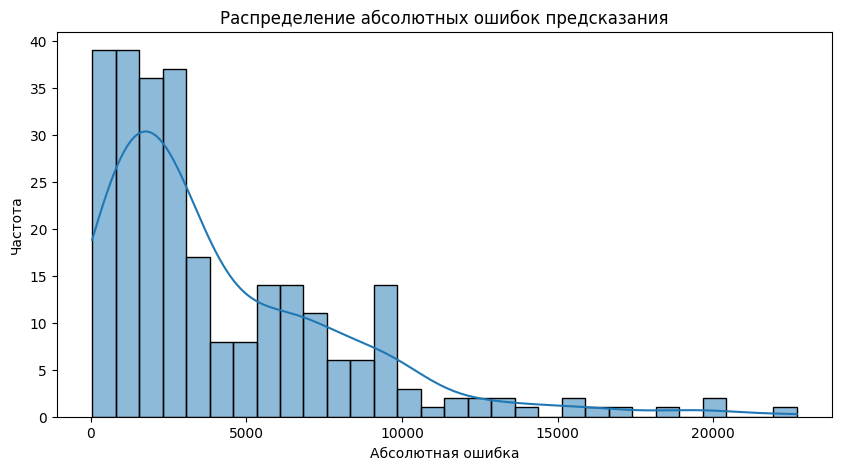

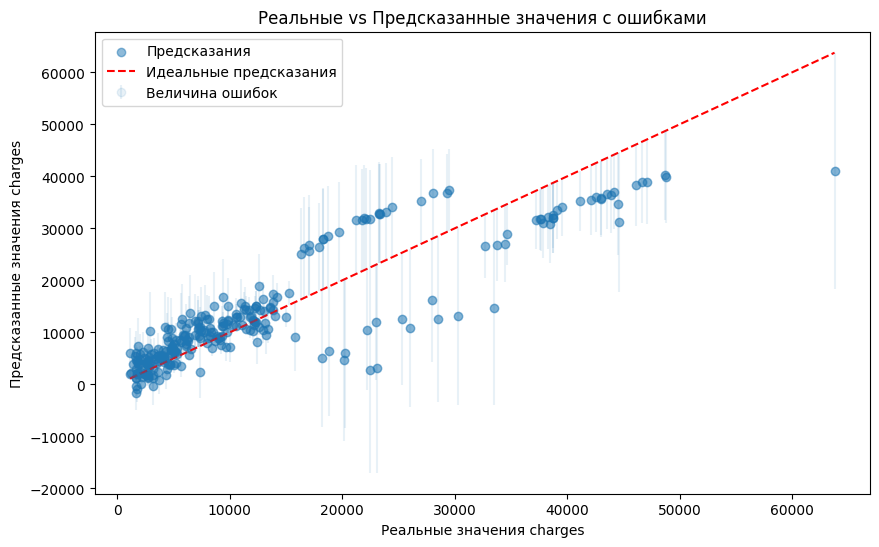

In [24]:
# Дополнительная визуализация ошибок

# Распределение абсолютных ошибок
plt.figure(figsize=(10, 5))
sns.histplot(np.abs(y_test - y_pred), bins=30, kde=True)
plt.title('Распределение абсолютных ошибок предсказания')
plt.xlabel('Абсолютная ошибка')
plt.ylabel('Частота')
plt.show()

# График реальных vs предсказанных значений с ошибками
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Предсказания')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Идеальные предсказания')
plt.errorbar(y_test, y_pred, yerr=np.abs(y_test-y_pred),
             fmt='o', alpha=0.1, label='Величина ошибок')
plt.xlabel('Реальные значения charges')
plt.ylabel('Предсказанные значения charges')
plt.title('Реальные vs Предсказанные значения с ошибками')
plt.legend()
plt.show()